# **Desafio prático - Classificação de dados com a competição do Titanic**

## **Bibliotecas auxiliares**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Conhecendo nossos conjuntos de dados**

In [2]:
df = pd.read_csv('data/train.csv')
submission = pd.read_csv('data/test.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
submission.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


Na tabela abaixo podemos conferir o significado de cada um dos atributos presentes no conjunto de dados:

|Atributo| Descrição|
|--------|----------|
|**PassengerId**| id do passageiro|
|**Pclass**| classe do ticket|
|**Name**|nome do passageiro|
|**Sex**|gênero do passageiro|
|**Age**|idade do passageiro (em anos)|
|**SibSp**|Quantidade de irmãos/cônjuge que também embarcaram no Titanic|
|**Parch**|Quantidade de pais/filhos que também embarcaram no Titanic|
|**Ticket**|Número do ticket do passageiro|
|**Fare**|Tarifa paga pelo passageiro|
|**Cabin**|Número da cabine|
|**Embarked**|Porto de embarque (C = Cherbourg, Q = Queenstown e S = Southampton)|
|**Survived**|Indica se o passageiro sobreviveu ou não ao naufrágio (é o nosso target)|


In [5]:
df.shape

(891, 12)

In [6]:
submission.shape

(418, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


### **Remoção de features irrelevantes**

In [9]:
def count_unique(df):
  print("Quantidade de valores únicos para cada feature")
  for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

In [10]:
count_unique(df)

Quantidade de valores únicos para cada feature
PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3


In [11]:
columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df = df.drop(columns, axis=1)

In [12]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [13]:
df.shape

(891, 8)

### **Análise exploratória (Exploratory Data Analysis - EDA)**

### Survived (Sobrevivência do passageiro)

In [14]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

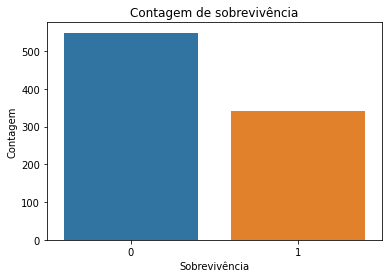

In [15]:
sns.countplot(data=df, x = 'Survived')
plt.title("Contagem de sobrevivência")
plt.xlabel('Sobrevivência')
plt.ylabel('Contagem')
plt.show()

In [16]:
print(f"Considerando nosso conjunto de dados, {df.Survived.value_counts()[0]/df.shape[0]*100:.2f}% dos passageiros não sobreviveram ao naufrágio :(")

Considerando nosso conjunto de dados, 61.62% dos passageiros não sobreviveram ao naufrágio :(


###  Pclass (classe do ticket do passageiro) 	 	 	 	 	 	

1 - Classe alta
2 - Classe média
3 - Classe baixa

In [17]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

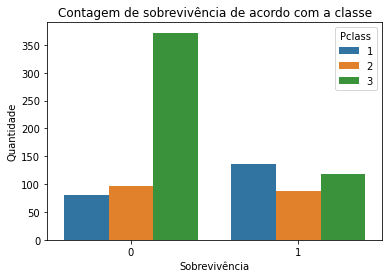

In [18]:
p = sns.countplot(data=df, x = 'Survived', hue = 'Pclass')
plt.title("Contagem de sobrevivência de acordo com a classe")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

In [19]:
# proporção de sobrevivência por classe
df[["Pclass", "Survived"]].groupby(['Pclass']).mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


###  Sex (gênero do passageiro) 	 	 	 	

In [20]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

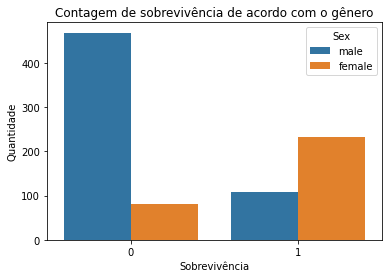

In [21]:
p = sns.countplot(data=df, x = 'Survived', hue = 'Sex')
plt.title("Contagem de sobrevivência de acordo com o gênero")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

In [22]:
# proporção de sobrevivência por gênero
df[["Sex", "Survived"]].groupby(['Sex']).mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


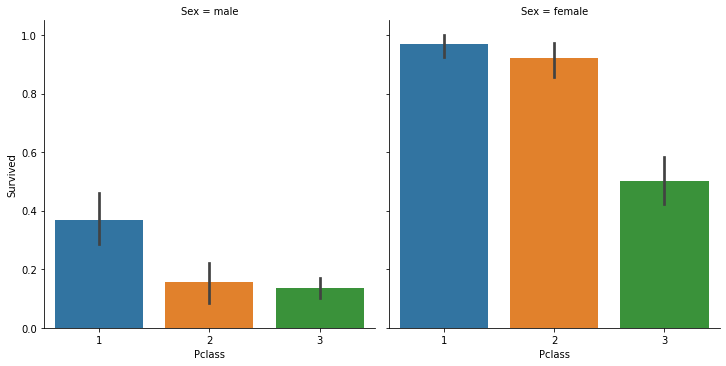

In [23]:
sns.catplot(x="Pclass", y="Survived", col="Sex", data=df,kind="bar");

###  Age (idade do passageiro) 	 	

In [24]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


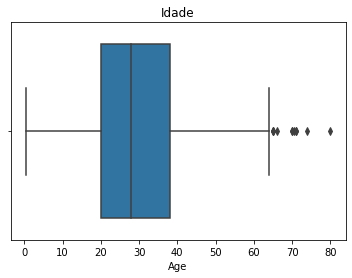

In [25]:
_ = sns.boxplot(df['Age']).set_title("Idade")

In [26]:
survived_age_not_null = df.loc[(df.Survived == 1) & (df.Age.isnull()==False), 'Age']
not_survived_age_not_null = df.loc[(df.Survived == 0) & (df.Age.isnull()==False), 'Age']

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


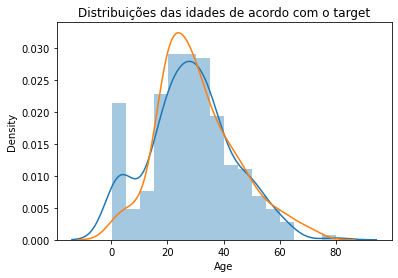

In [27]:
sns.distplot(survived_age_not_null, hist=True, label='Sobreviveu')
sns.distplot(not_survived_age_not_null, hist=False, label='Não sobreviveu')
_ = plt.title("Distribuições das idades de acordo com o target")

### **Tarefinha pra casa**

Por conta do tempo, não vamos conseguir fazer a análise de todas as features :(

Então sugerimos que vocês façam a análise das features que ficaram faltando:
- Fare
- Embarked
- SibSp
- Parch

Algumas ideias de análises que podem ser feitas:
- Comparar a tarifa paga pelo passageiro dependendo de sua classe
- Analisar se o tamanho da família influenciou na sobrevivência (o tamanho da família pode ser dado pela soma das features `SibSp` e `Parch`)
- Analisar se há diferença da tarifa paga dependendo do porto de embarque
- Verificar a correlação entre as features utilizando um heatmap

Text(0.5, 1.0, 'Tarifa paga pelo passageiro por classe')

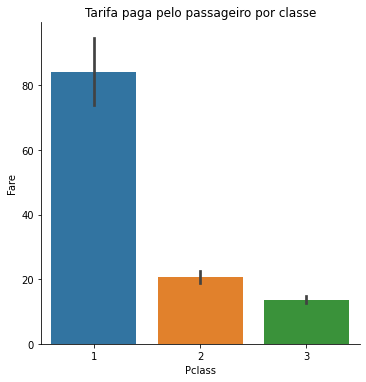

In [28]:
sns.catplot(x='Pclass', y='Fare', data= df, kind = 'bar')
plt.title('Tarifa paga pelo passageiro por classe')

In [29]:
df['tamanho_familia'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,tamanho_familia
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


Text(0.5, 1.0, 'Tarifa por tamanho da família do passageiro')

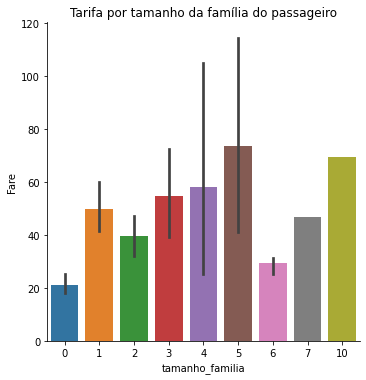

In [30]:
sns.catplot(data=df, x='tamanho_familia', y='Fare', kind='bar')
plt.title('Tarifa por tamanho da família do passageiro')

Text(0.5, 1.0, 'Tarifa por portão de embarque')

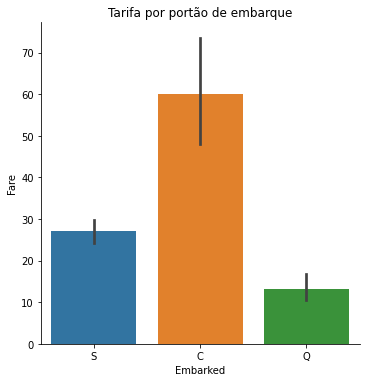

In [31]:
sns.catplot(data=df, x='Embarked', y='Fare', kind ='bar')
plt.title('Tarifa por portão de embarque')

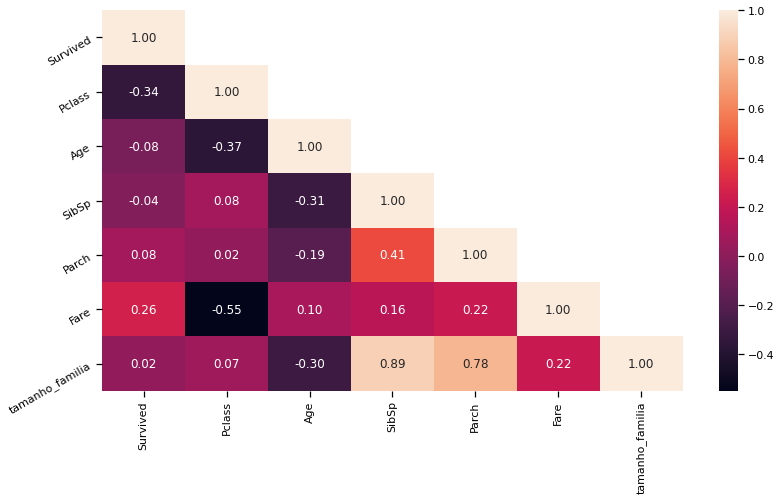

In [32]:
import numpy as np
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Feature Engineering

### **Tarefinha pra casa**

**Que outras transformaçõs poderíamos fazer em nosso conjunto de dados?**
- Criar categorias para a idade (criança, adulto, idoso, por exemplo)
- Criar uma feature para indicar o tamanho da família (soma das features `SibSp` e `Parch`)
- [Aqui](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) também algumas ideias de feature engineering para esse desafio

Tentem fazer algumas dessas transformações ou fazer outras que vocês acreditam que façam sentido :D 

In [33]:
df['faixa_etaria'] = df['Age']

faixa = []
for i in df['faixa_etaria']:
    if i >= 60:
        faixa.append('Idoso')
    elif i >= 15 and i< 60:
        faixa.append('Adulto')
    else:
        faixa.append('Criança')
df['faixa_etaria'] = faixa

In [34]:
df['faixa_etaria'].value_counts()

Adulto     610
Criança    255
Idoso       26
Name: faixa_etaria, dtype: int64

In [35]:
df.drop('tamanho_familia', axis=1, inplace=True)

In [36]:
df.drop('faixa_etaria', axis=1, inplace=True)

In [37]:
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

#### **Tratamento de valores faltantes (missing values)**

In [38]:
median_age = df['Age'].median() 

In [39]:
df.loc[df['Age'].isnull(), 'Age'] = median_age

#### **Conversão de features categóricas**

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

In [41]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [43]:
df['Embarked'].value_counts() 

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

## Treinamento

In [44]:
# nossas features
X = df[['Age', 'Sex', 'Pclass']]

# nosso target
y = df['Survived']

In [45]:
from sklearn.model_selection import train_test_split

# Separando os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
X_train.shape

(668, 3)

In [47]:
X_test.shape

(223, 3)

In [48]:
# normalizando os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Instanciando o classificador
model = DecisionTreeClassifier(criterion='entropy', random_state=42, min_samples_split=8, min_samples_leaf=3)

# Treinamento do modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=8, random_state=42)

## Avaliando nosso modelo

In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [52]:
y_probs = model.predict_proba(X_test)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test, y_pred)

0.7802690582959642

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import itertools

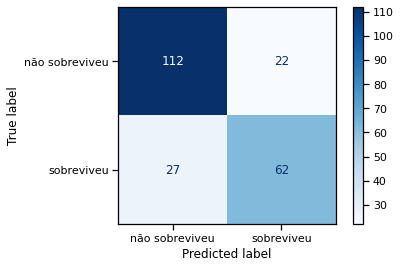

In [56]:
cnf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['não sobreviveu', 'sobreviveu'])
disp.plot(cmap='Blues')

In [57]:
print(classification_report(y_test, y_pred, target_names=['não sobreviveu', 'sobreviveu']))

                precision    recall  f1-score   support

não sobreviveu       0.81      0.84      0.82       134
    sobreviveu       0.74      0.70      0.72        89

      accuracy                           0.78       223
     macro avg       0.77      0.77      0.77       223
  weighted avg       0.78      0.78      0.78       223



In [58]:
from sklearn.metrics import roc_curve, auc

# curva roc e  taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc(fpr, tpr)

0.766225054502767

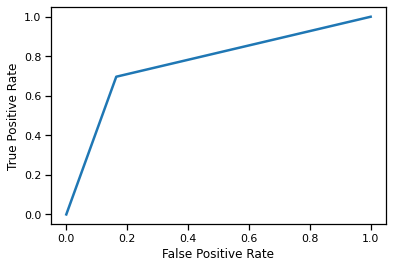

In [59]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [61]:
import shap

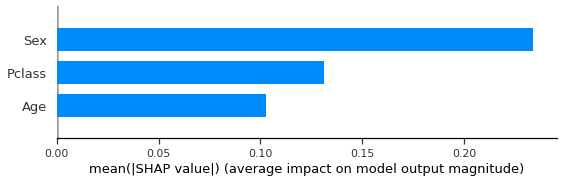

In [62]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[1], X_train, plot_type='bar')

## Predição


In [63]:
# substituímos os valores faltantes pela mediana da idade do conjunto de treinamento
median_age = df['Age'].median() 
submission.loc[submission['Age'].isnull(), 'Age'] = median_age

In [64]:
submission['Sex'] = encoder.fit_transform(submission['Sex'])

In [65]:
# realiza a predição para o conjunto de submissão do Kaggle
result = model.predict(submission[['Age', 'Sex', 'Pclass']])
result

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [71]:
# transformar o array em um DataFrame para concatenarmos como ID
results = pd.DataFrame(list(result), columns=['Survived'])

In [72]:
submission = pd.concat([submission['PassengerId'], results],axis=1)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [73]:
submission.to_csv("titanic_submission.csv", index=False)

## Próximos passos

Ainda podemos melhorar **MUITO** o nosso modelo :) 

O que podemos fazer?

- Como pudemos ver, nossa árvore está sofreu overfitting. Podemos mudar diversos parâmetros da nossa árvore para evitar que isso aconteça. Alguns parâmetros que podemos alterar:
  - **max_depth** (profundidade máxima da árvore) - podemos determinar um valor para que ela não se aprofunde demais
  - **min_samples_split** (número mínimo de exemplos para dividir um nó interno) - podemos aumentar o número (o mínimo *default* é 2) para diminuir o número de divisões
  - **min_samples_leaf** (número mínimo de exemplos para que um nó seja uma folha) - podemos aumentar o número (o mínimo *default* é 1) para diminuir o número de folhas
- Podemos realizar outras transformações na etapa de feature engineering ou criar novas features
- Também podemos treinar o modelo adicionando as outras features que não vimos nessa aula. Talvez elas possam ajudar na predição ;)
- Além disso, é interessante ver as outras métricas de avaliação para entendermos melhor o nosso modelo e como podemos melhorá-lo!

### **Tarefinha pra casa**


Tentem fazer algumas (ou todas) as sugestões feitas nesse notebook e fazer a submissão das predições no Kaggle novamente!  

Vale testar também a aplicação de [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) nesse problema! Ou até outros modelos que vocês aprenderem nos materiais complementares que deixamos! :)

Na próxima aula vocês nos contam se a acurácia do modelo melhorou :D 